## INTRODUCTION

Hello folks at SyncVR,

I'm really happy for this opportunity you've given me to try for an internship at your firm as a data analyst. 

For the assignment I was tasked with, the dataset selected will be the Healthcare Dataset on Stroke from Kaggle; available at this link (https://www.kaggle.com/code/rishabh057/healthcare-dataset-stroke-data).

A copy of the dataset is also available at the repository hosting this notebook in the data folder.

With only a day to put this together I decided to go with this dataset.

My main reasons are:
1. There are only a few missing observations (201) which are only on a single column and account for a small subset (3.9%) of the 5110 samples in the dataset.
2. As a Kaggle dataset, the data is mostly prepocessed and clean enough to begin mining for information.
3. Lastly it is in a related field to the sector your firm operates and would allow me to better demonstrate my skills in a project on a closely related subject - STROKE!

Further more, the observations with null entries for body mass index (bmi) are retained for further analysis. This might be frowned on by some other analysts but, I choose to leave them in as the purpose of this venture is not to make predictions on the target column (stroke) rather, to explore the dataset for descriptive insights; plus there are no algorithms utilized that would break due to the missing values. It would be a waste to drop these observations and lose the descriptive contributions they offer to this sample data.

## LIBRARY IMPORTS

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set() #this forces seaborn styling to be the default

A few useful libraries are loaded into the workspace to prepare for analysis.

'os' for some useful file explorer functions

'numpy' and 'pandas' for numerical analysis

'matplotlib' and 'seaborn' for visualizations

In [2]:
os.listdir("data") #checking the exact filename

['archive (5).zip', 'healthcare-dataset-stroke-data.csv']

## LOADING THE DATASET

In [3]:
df=pd.read_csv("data/healthcare-dataset-stroke-data.csv") #load the entire dataset into a pandas dataframe object

strokes=df[df.stroke==1] #create a new dataframe with a subset of the original were a value of 1 was given for stroke

non_strokes=df[df.stroke==0] #repeat the previous step for non-stroke occurences

To begin, let's take a look at the dataset with the help of pandas tabular formating

Also, further subsets of the data to separate individuals who had stroke from those who didn't is stored in separate dataframes 'strokes'  and 'non_strokes'

In [4]:
df.head() #displays the top 5 observations in the sample

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info() #confirm the data type of the values in each columns and check for missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB



Everthing seems in order

Before continuing with the analysis, a brief description of the data in each column

Available columns are id, gender, age, et cetra and of course the target column 'stroke'.

The 'id' column anonymizes the actual individuals for a bit of privacy as some personal information such as marital, employment and smoking status is also included. Privacy restrictions are important when working with healthcare datasets.

Generally the data type consists of the following: 

- Continuous numeric types (in the cases of average glucose level and age features)
- Binary types (in the case of hypertension, heart disease features)
- Categorical types (in the cases of gender, marital status, work type, smoking status and residence)

All these ten features (excluding the id column) are likely to offer good predictors for predicting the occurence of stroke in an at risk patient.


In [6]:
df.describe(include='all') #get quick descriptive statistics on each column -- the include = 'all' forces statistics for categorical columns to be displayed as well

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [7]:
print('Number of samples with stroke: ',len(strokes))
print('Number of samples with no stroke: ',len(non_strokes))

Number of samples with stroke:  249
Number of samples with no stroke:  4861


In [8]:
print('% of samples with stroke: ',round(len(strokes)*100/len(df),2))
print('% of samples with no stroke: ',round(len(non_strokes)*100/len(df),2))

% of samples with stroke:  4.87
% of samples with no stroke:  95.13


- There are only 249 samples observed to have had stroke from the sample which accounts for only 4.87% of the total observations in the sample, making this a largely imbalanced dataset.

### GENDER

In [9]:
df.gender.unique() #confirm decriptive statistics

array(['Male', 'Female', 'Other'], dtype=object)

- Looking into the features for descriptive statistics, the first layer of things noticebale is the gender column with 3 unique types.

In [10]:
df[df.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


- Further investigation show that there is only a single observation with the label of 'Other' as opposed to 'Male' and 'Female'. Moreover, this observation was recorded to not have stroke so, no gems found yet. 

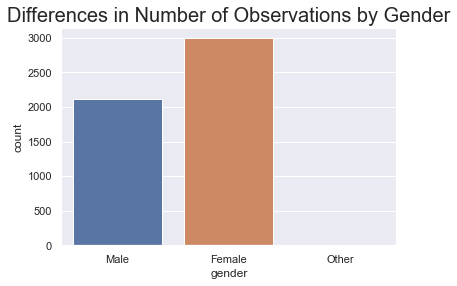

In [11]:
sns.countplot(x=df.gender)
plt.title('Differences in Number of Observations by Gender',fontsize=20)
plt.show()

- A closer look also reveals that the 'Female' gender has a higher frequency. Visualizing this with seaborn's countplot function which is a useful plot for depicting differences in frequencies. Whether this is a clear pattern that is useful requires more context.

To determine the relevance of this difference, we take a look at the individuals with stroke specifically and those without. 

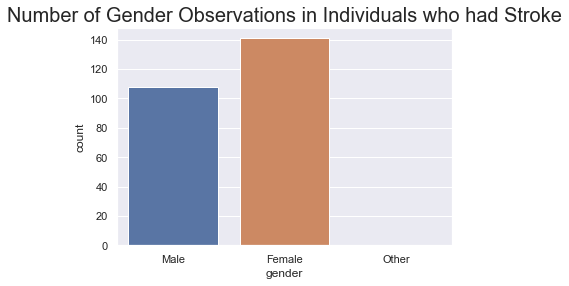

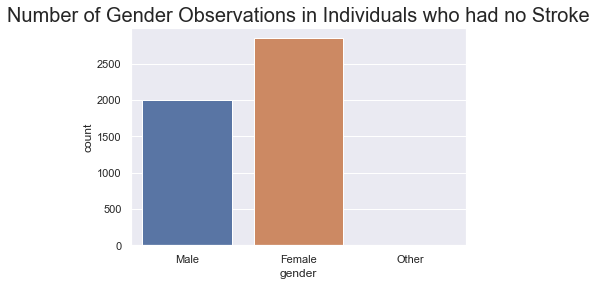

In [12]:
sns.countplot(x=strokes.gender,order=['Male','Female','Other'])
plt.title('Number of Gender Observations in Individuals who had Stroke',fontsize=20)
plt.show()

sns.countplot(x=non_strokes.gender)
plt.title('Number of Gender Observations in Individuals who had no Stroke',fontsize=20)
plt.show()

- The range is still more or less the same and is probably due to a biased sampling favouring females. Nothing quite useful yet.

### AGE

Next to look at is age, which some little domain knowledge attests to a greater risk of stroke at later ages. 

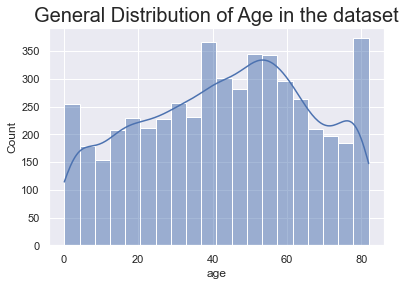

In [13]:
sns.histplot(x=df.age,kde=True)
plt.title('General Distribution of Age in the dataset',fontsize=20)
plt.show()

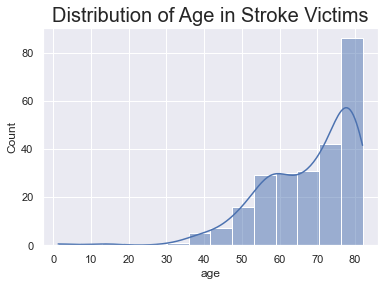

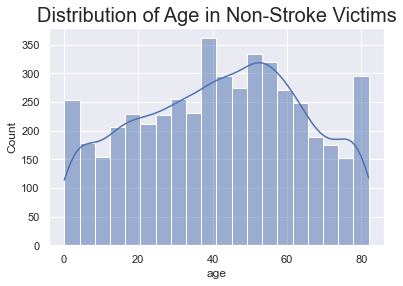

In [14]:
sns.histplot(x=strokes.age,kde=True)
plt.title('Distribution of Age in Stroke Victims',fontsize=20)
plt.show()

sns.histplot(x=non_strokes.age,kde=True)
plt.title('Distribution of Age in Non-Stroke Victims',fontsize=20)
plt.show()

- The non_stroke individuals muddy the dataset a bit and hides the obvious observation clearly depicted by the visualization of the same trend on just the individuals recorded as having suffered stroke.

- The long left tail or left skewed plot clearly confirms that the majority of the stroke individuals have ages in the digits of 60 upwards. Now this is useful!

### HYPERTENSION & HEART DISEASE

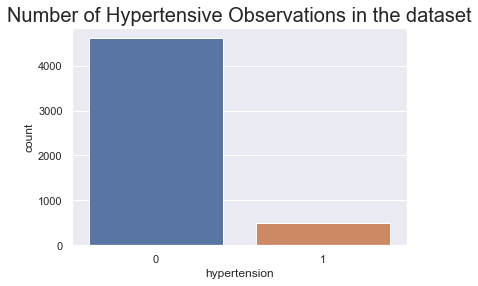

In [15]:
sns.countplot(x=df.hypertension)
plt.title('Number of Hypertensive Observations in the dataset',fontsize=20)
plt.show()

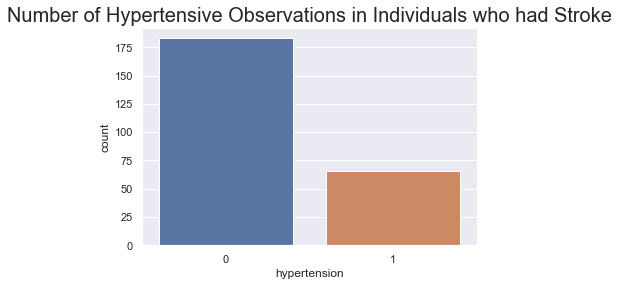

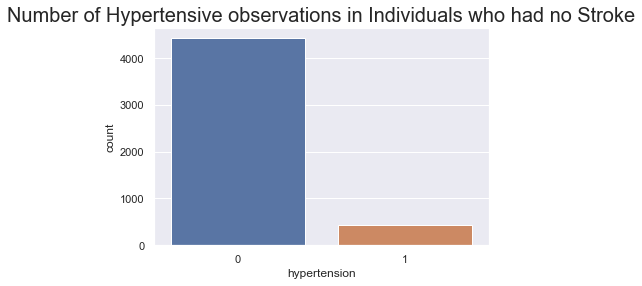

In [16]:
sns.countplot(x=strokes.hypertension)
plt.title('Number of Hypertensive Observations in Individuals who had Stroke',fontsize=20)
plt.show()

sns.countplot(x=non_strokes.hypertension)
plt.title('Number of Hypertensive observations in Individuals who had no Stroke',fontsize=20)
plt.show()

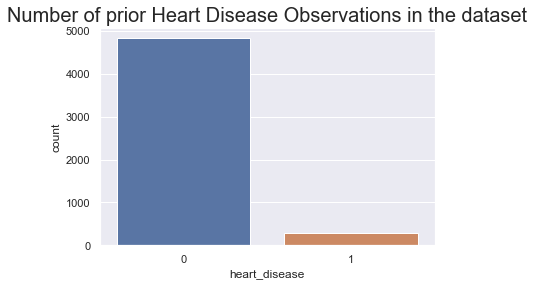

In [17]:
sns.countplot(x=df.heart_disease)
plt.title('Number of prior Heart Disease Observations in the dataset',fontsize=20)
plt.show()

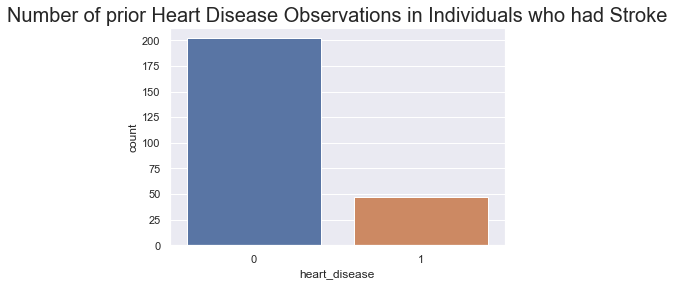

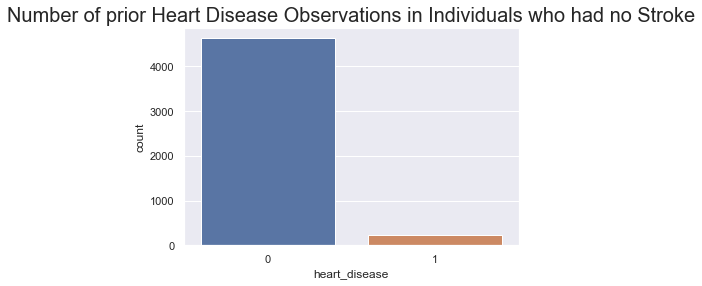

In [18]:
sns.countplot(x=strokes.heart_disease)
plt.title('Number of prior Heart Disease Observations in Individuals who had Stroke',fontsize=20)
plt.show()

sns.countplot(x=non_strokes.heart_disease)
plt.title('Number of prior Heart Disease Observations in Individuals who had no Stroke',fontsize=20)
plt.show()

- One might naturally assume that there would be high correlation of these conditions with stroke but both features seem to indicate that a lack of hypertension and heart disease might actually be a good indicator of stroke occurence from the observably higher counts in both stroke and non-stroke cases.

- Truthfully, this seems counter intuitive and might be due to a lot of reasons but, the evidence hints otherwise.

- Possible hypothesis that might explain this might include a reality were individuals rarely have both stroke and hypertension or stroke and heart disease or just simply that hypertension and heart disease are rare enough occurrences. 

- A good hypothesis test would be required to make any inferences on the evidence of such trends in sampled data from the population of patients with stroke. So, no dice here.

### MARITAL STATUS

Now a really interesting feature. I must admit I am really curious to find out what the data would depict concerning this feature as a predictor of stroke.

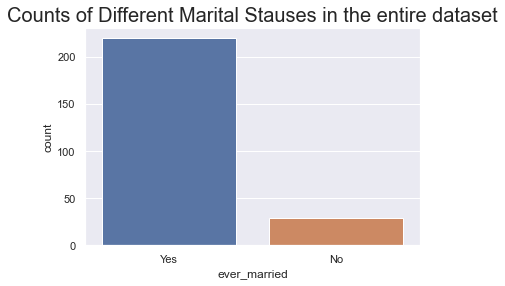

In [19]:
sns.countplot(x=strokes.ever_married)
plt.title('Counts of Different Marital Stauses in the entire dataset',fontsize=20)
plt.show()

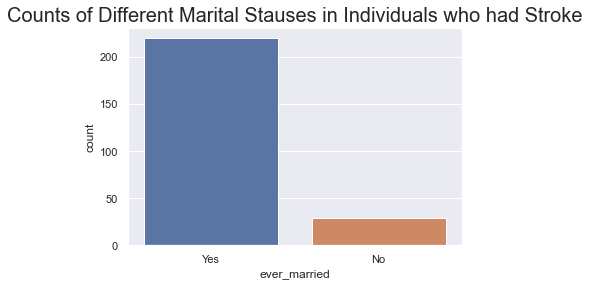

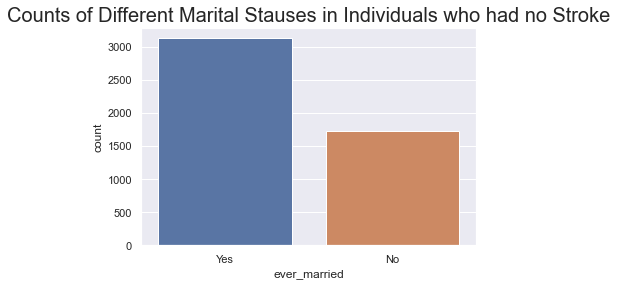

In [20]:
sns.countplot(x=strokes.ever_married)
plt.title('Counts of Different Marital Stauses in Individuals who had Stroke',fontsize=20)
plt.show()

sns.countplot(x=non_strokes.ever_married,order=['Yes','No'])
plt.title('Counts of Different Marital Stauses in Individuals who had no Stroke',fontsize=20)
plt.show()

- Staring at the tabular representation of 'Yes' and 'No' provides no clear insights. Turning yet again to countplot, it is observed that the trend is generally the same in all three plots.

- However, there seems to be a much higher ratio of individuals who have been married among the individuals with stroke.

In [21]:
print('General % of Individuals who have been married in the dataset')
print(round(df.ever_married.value_counts()[0]/len(df)*100,2))
print()
print('% of Individuals who have been married with Stroke')
print(round(strokes.ever_married.value_counts()[0]/len(strokes)*100,2))
print()
print('% of Individuals who have been married with no Stroke')
print(round(non_strokes.ever_married.value_counts()[0]/len(non_strokes)*100,2))

General % of Individuals who have been married in the dataset
65.62

% of Individuals who have been married with Stroke
88.35

% of Individuals who have been married with no Stroke
64.45


- According to the dataset and evident from the plots, it is seen that 88.35% of stroke victims have been married while only 64.45% of nonhave been married.

### WORK TYPE

Let's turn next to see how work type influences the occurence of stroke in an individual.

In [22]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

- The labels here are Private, Government, Self-employed, Never employed, and Children related job categories. 

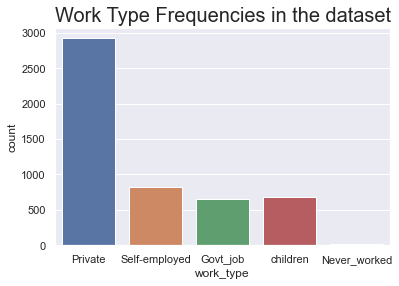

In [23]:
sns.countplot(x=df.work_type,order=['Private','Self-employed','Govt_job','children','Never_worked'])
plt.title('Work Type Frequencies in the dataset',fontsize=20)
plt.show()

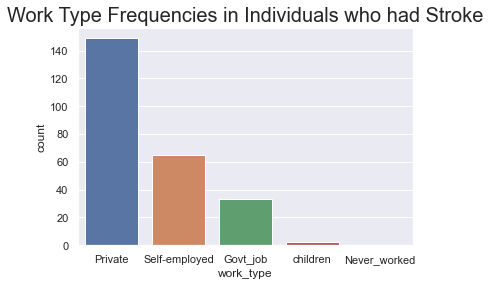

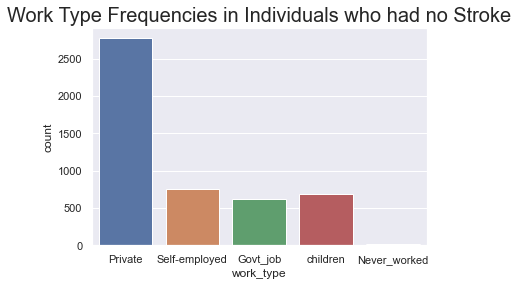

In [24]:
sns.countplot(x=strokes.work_type,order=['Private','Self-employed','Govt_job','children','Never_worked'])
plt.title('Work Type Frequencies in Individuals who had Stroke',fontsize=20)
plt.show()

sns.countplot(x=non_strokes.work_type,order=['Private','Self-employed','Govt_job','children','Never_worked'])
plt.title('Work Type Frequencies in Individuals who had no Stroke',fontsize=20)
plt.show()

- Looking at the countplots, there doesn't seem to be much going on but, the story behind these charts further embellished by the numerical quantities quantifying the percentages of each group for each category is interesting. 


In [25]:
for l in df.work_type.unique():
    print(l)
    print('df: ',round((len(df[df.work_type== l]) / len(df))*100,2))
    print('strokes: ',round((len(strokes[strokes.work_type== l]) / len(strokes))*100,2))
    print('non_strokes: ',round((len(non_strokes[non_strokes.work_type== l]) / len(non_strokes))*100,2))
    print()

Private
df:  57.24
strokes:  59.84
non_strokes:  57.11

Self-employed
df:  16.03
strokes:  26.1
non_strokes:  15.51

Govt_job
df:  12.86
strokes:  13.25
non_strokes:  12.84

children
df:  13.44
strokes:  0.8
non_strokes:  14.09

Never_worked
df:  0.43
strokes:  0.0
non_strokes:  0.45



- From the top, we see that the levels of stroke occurrence and non-occurence in persons working private jobs only vary by neglible amounts. Same with Government jobs as well.
- It seems the Private Company and Government jobs are the better options compared to Self-employed individuals who likely have to deal with a lot more stress apparently.
- Most intersting is the Children related jobs which shows an astonishing low level of cases with stroke victims. Must be all that childhood joy or the possibilty that persons who do such jobs tend to be more friendly. 

In [26]:
df[df.work_type=="Never_worked"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,13948,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,56986,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,41870,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,51935,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,23508,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


- Most of the individuals who have never worked are teenagers with one exception in his 20s. Such is typical as they are probably still in school so, with little possibility of bearing on the occurence of stroke.

- With these insights, we clearly see a story told that Government jobs are not much better than Private jobs in increasing risks of suffering a stroke. 
- An inital look at the plots showed a greater count of individuals of the "Private" work type category but that might just be due to how the samples were collected which inheretly sampled more Private company employees. 

- This was made clearer with a look at the ratios of each group intrinsically which put the differences to much the same extents.
- Second, we see that on the far end of the spectrum, jobs that involve children tend to result in fewer cases of stroke victims. 
- Finally, the self employed category produced a highest percentage of stroke victims at almost double that of non-stroke individuals with the same work type.

### RESIDENCE

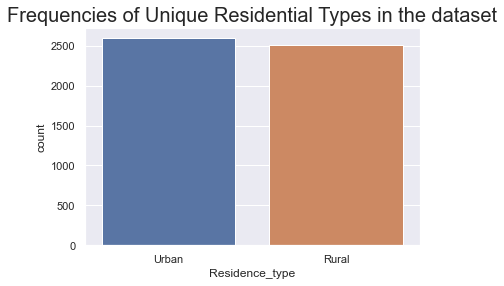

In [27]:
sns.countplot(x=df.Residence_type)
plt.title('Frequencies of Unique Residential Types in the dataset',fontsize=20)
plt.show()

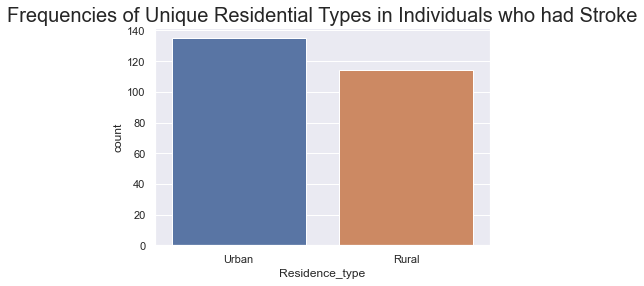

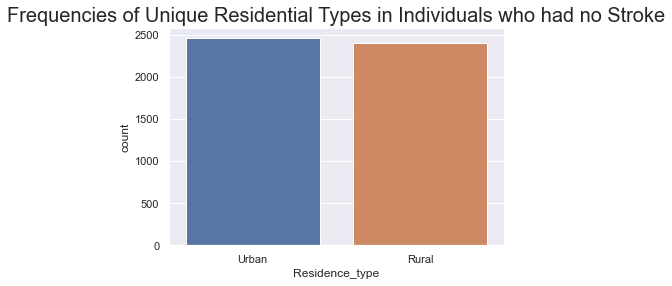

In [28]:
sns.countplot(x=strokes.Residence_type)
plt.title('Frequencies of Unique Residential Types in Individuals who had Stroke',fontsize=20)
plt.show()

sns.countplot(x=non_strokes.Residence_type,order=['Urban','Rural'])
plt.title('Frequencies of Unique Residential Types in Individuals who had no Stroke',fontsize=20)
plt.show()

The Residence type shows no clear differences between urban and rural areas and exhibit a similar trend of slightly fewer cases in both cases of stroke and non-stroke victims, same as the trend in the entire sample.

### AVERAGE GLUCOSE LEVEL

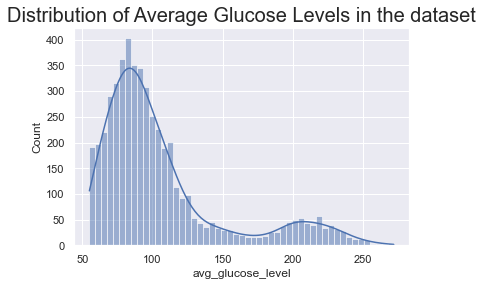

In [29]:
sns.histplot(df.avg_glucose_level,kde=True)
plt.title('Distribution of Average Glucose Levels in the dataset',fontsize=20)
plt.show()

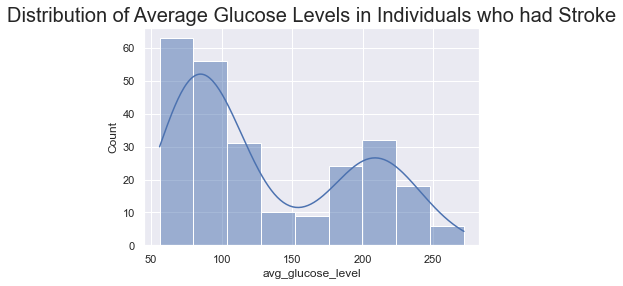

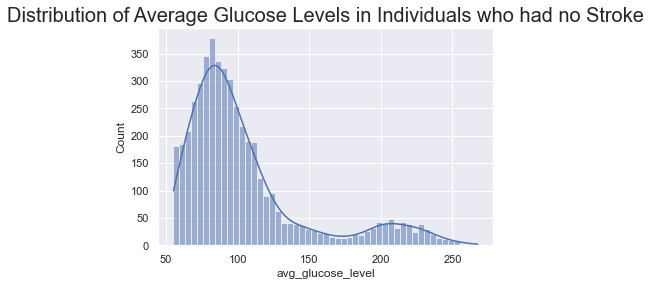

In [30]:
sns.histplot(strokes.avg_glucose_level,kde=True)
plt.title('Distribution of Average Glucose Levels in Individuals who had Stroke',fontsize=20)
plt.show()

sns.histplot(non_strokes.avg_glucose_level,kde=True)
plt.title('Distribution of Average Glucose Levels in Individuals who had no Stroke',fontsize=20)
plt.show()

- The Average Glucose Level produce right-skewed plots for the entire sample and in each separate case of stroke and non-stroke individuals. 

- Nothing quite clear yet, drilling down with a different sort of visualization, it is seen that there does appear to be some differnces with the stroke and non-stroke groups.

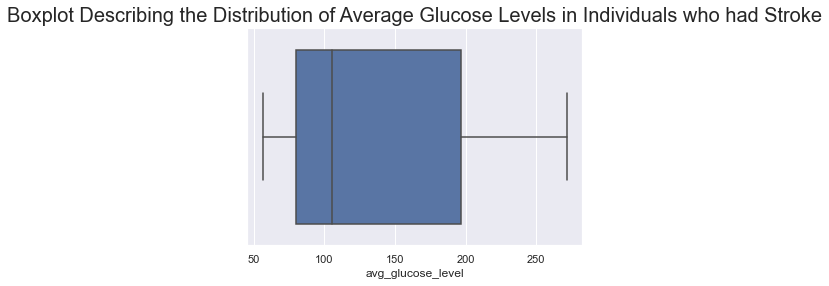

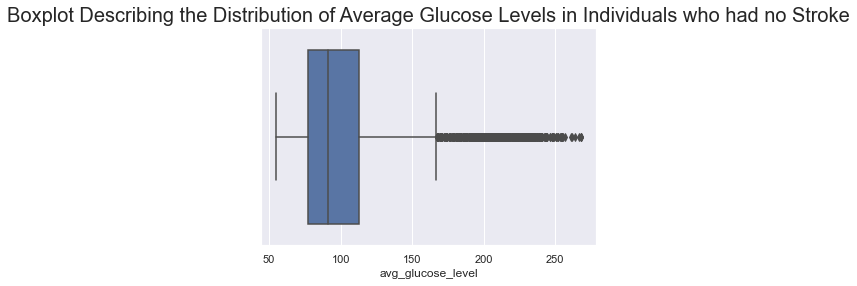

In [31]:
sns.boxplot(x=strokes.avg_glucose_level)
plt.title('Boxplot Describing the Distribution of Average Glucose Levels in Individuals who had Stroke',fontsize=20)
plt.show()

sns.boxplot(x=non_strokes.avg_glucose_level)
plt.title('Boxplot Describing the Distribution of Average Glucose Levels in Individuals who had no Stroke',fontsize=20)
plt.show()

- The boxplot shows that the range of values is quite spread for stroke cases with a large span between the median line and the 75th percentile line. 
- There are also no easily observable outlier values outside the group's distribution
- For the non-stroke cases, there are a lot of outliers, noticeable from the large population of black dots to the right of the plot. 
- Also the range across percentiles is also not as spread as with the stroke cases.

- The major observation here is that the majority of stroke cases have larger average glucose level than the group without stroke. 

In [32]:
strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [33]:
non_strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


In [34]:
print('Comparative View Average Glucose Level Descriptive Statistics\n')
print('Means')
print('Stroke',round(np.mean(strokes.avg_glucose_level),2))
print('Non-stroke',round(np.mean(non_strokes.avg_glucose_level),2))
print()
for n in [0,25,50,75,100]:
    print(str(n)+"th percentile")
    print('Stroke',np.percentile(strokes.avg_glucose_level,n))
    print('Non-stroke',np.percentile(non_strokes.avg_glucose_level,n))
    print()

Comparative View Average Glucose Level Descriptive Statistics

Means
Stroke 132.54
Non-stroke 104.8

0th percentile
Stroke 56.11
Non-stroke 55.12

25th percentile
Stroke 79.79
Non-stroke 77.12

50th percentile
Stroke 105.22
Non-stroke 91.47

75th percentile
Stroke 196.71
Non-stroke 112.83

100th percentile
Stroke 271.74
Non-stroke 267.76



Looking at the numeric values comaparatively, they both have close mean and max observations with the stroke cases being higher in both parameter but the largest values of the non-stroke cases are recognized in the boxplot as mostly outliers with
- it's 100th percentile line lying somewhere in between the values of 150 and 200.
- It is thus possible to state that stroke cases characterize with higher average glucose level than non-stroke cases according to the dataset.

### BODY MASS INDEX

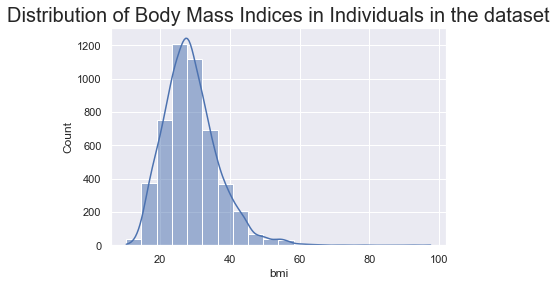

In [35]:
sns.histplot(x=df.bmi,bins=20,kde=True)
plt.title('Distribution of Body Mass Indices in Individuals in the dataset',fontsize=20)
plt.show()

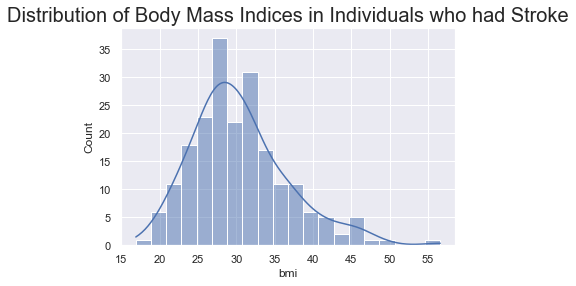

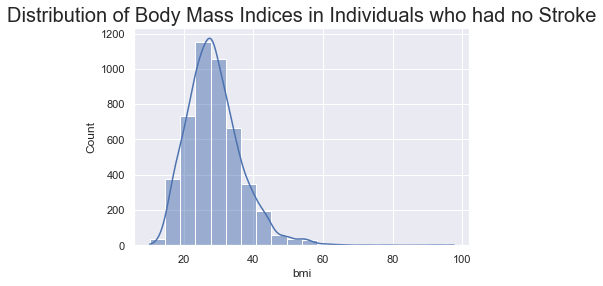

In [36]:
sns.histplot(x=strokes.bmi,bins=20,kde=True)
plt.title('Distribution of Body Mass Indices in Individuals who had Stroke',fontsize=20)
plt.show()

sns.histplot(x=non_strokes.bmi,bins=20,kde=True)
plt.title('Distribution of Body Mass Indices in Individuals who had no Stroke',fontsize=20)
plt.show()

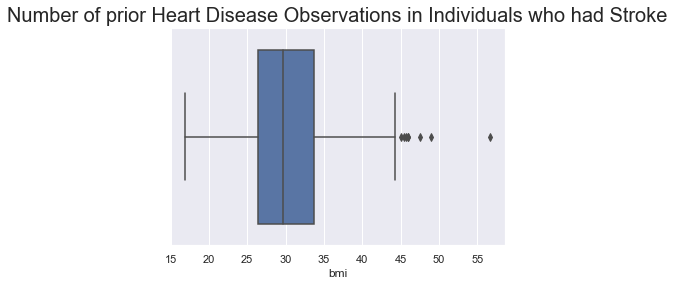

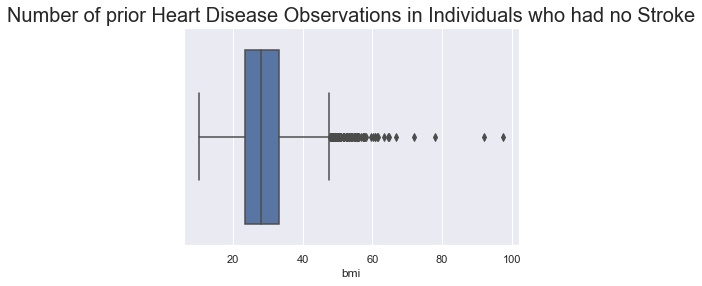

In [37]:
sns.boxplot(x=strokes.bmi)
plt.title('Number of prior Heart Disease Observations in Individuals who had Stroke',fontsize=20)
plt.show()

sns.boxplot(x=non_strokes.bmi)
plt.title('Number of prior Heart Disease Observations in Individuals who had no Stroke',fontsize=20)
plt.show()

- The distribution plots and boxplots show no useful insights for the data, both stroke and non-stroke cases have similar distributions with a greater case of outliers in the non-stroke group.

### SMOKING STATUS

The last feature to analyze is the smoking status of the individuals.

In [38]:
print('Value Counts of the Various Smoking Status Categories among Stroke Cases\n')
strokes.smoking_status.value_counts()

Value Counts of the Various Smoking Status Categories among Stroke Cases



never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

In [39]:
print('Value Counts of the Various Smoking Status Categories among non-Stroke Cases\n')
non_strokes.smoking_status.value_counts()

Value Counts of the Various Smoking Status Categories among non-Stroke Cases



never smoked       1802
Unknown            1497
formerly smoked     815
smokes              747
Name: smoking_status, dtype: int64

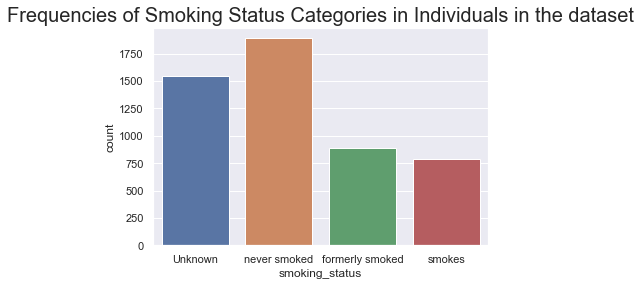

In [40]:
sns.countplot(x=df.smoking_status,order=['Unknown','never smoked','formerly smoked','smokes'])
plt.title('Frequencies of Smoking Status Categories in Individuals in the dataset',fontsize=20)
plt.show()

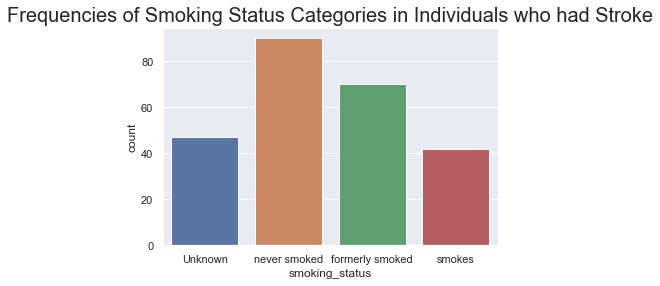

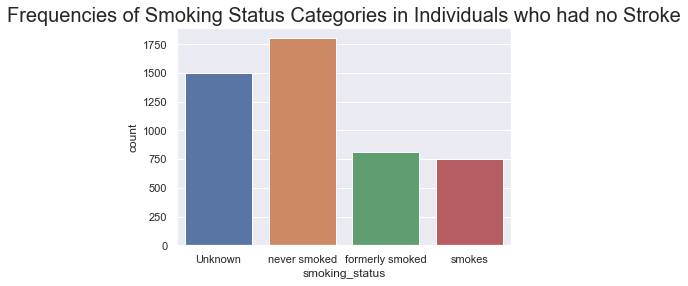

In [41]:
sns.countplot(x=strokes.smoking_status,order=['Unknown','never smoked','formerly smoked','smokes'])
plt.title('Frequencies of Smoking Status Categories in Individuals who had Stroke',fontsize=20)
plt.show()

sns.countplot(x=non_strokes.smoking_status,order=['Unknown','never smoked','formerly smoked','smokes'])
plt.title('Frequencies of Smoking Status Categories in Individuals who had no Stroke',fontsize=20)
plt.show()

- There is a noticeable effect supporting that smoking occurs more in stroke cases than non-stroke cases as observed from the countplots. 
- It might have been a find to observe that there was some correlation with pursued smoking habits and the occurence of stroke, due to the negative consequences attributed to such practice.
- Instead, at a high level and intrinsically within stroke and non-stroke groups, there was a higher count of individuals who claimed to have never smoked.

That concludes the univariate analysis and with not much time to go into bivariate and possibly multi-variate annalysis. I'll end here for now.

### CONCLUSION

This exploration was taken to analyse the Kaggle healthcare stroke dataset to reveal interesting finds.

Various discoveries were made through a simple univariate analysis of the data. From this analysis it was observed that:

- Occurence of Stroke becomes more probable with advancements in age with the majority of cases occuring by 60 years upwards.
    
- There was a very large number of observations that supported that hypertensive conditions and heart disease do not occur in individuals who have had strokes

- The data also revealed that there was a 23.9% higher percentage of stroke victims who had been married than those who had not been married. With 88.35% of stroke cases in the married category and the lesses 64.45% for non-stroke cases.
    
- Relating to various work types, it was observed that there were percentage differences of -13.29%, -0.45%, 0.41%, 2.73% and 10.59% for children related, no job, Government, private and self-employed work types respectively for stroke cases against non-stroke cases. Describing a story that states how much better children related jobs reduce the likelihood of also suffering stroke on one end and an opposite effect was likely for self-employed persons.

- Urban or Rural residential types were observed to have no considerable bearing on the occurence of stroke cases against non-stroke cases.
    
- Stroke cases presented with a wider interquartile range of average glucose level at 116.92 than the closer range of 35.71 in non-stroke cases. The observed 25th and 75th percentiles were 79.79 and 196.71, and 77.12 and 112.83 for stroke cases and non-stroke cases respectively. Showing that stroke cases presented with higher average glucose levels than the non-stroke counterparts.